# Importando librera y DF

In [1]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [2]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [53]:
STOP=['a ,actualmente ,adelante ,además ,afirmó ,agregó ,ahí ,ahora ,al ,algo ,algún ,alguna ,algunas ,alguno ,algunos ,alrededor ,ambos ,ampleamos ,añadió ,ante ,anterior ,antes ,apenas ,aproximadamente ,aquel ,aquellas ,aquellos ,aqui ,aquí ,arriba ,aseguró ,así ,atras ,aún ,aunque ,ayer ,bajo ,bastante ,bien ,buen ,buena ,buenas ,bueno ,buenos ,cada ,casi ,cerca ,cierta ,ciertas ,cierto ,ciertos ,cinco ,comentó ,como ,cómo ,con ,conocer ,conseguimos ,conseguir ,considera ,consideró ,consigo ,consigue ,consiguen ,consigues ,contra ,cosas ,creo ,cual ,cuales ,cualquier ,cuando ,cuanto ,cuatro ,cuenta ,da ,dado ,dan ,dar ,de ,debe ,deben ,debido ,decir ,dejó ,del ,demás ,dentro ,desde ,después ,dice ,dicen ,dicho ,dieron ,diferente ,diferentes ,dijeron ,dijo ,dio ,donde ,dos ,durante ,e ,ejemplo ,el ,él ,ella ,ellas ,ello ,ellos ,embargo ,empleais ,emplean ,emplear ,empleas ,empleo ,en ,encima ,encuentra ,entonces ,entre ,era ,eramos ,eran ,eras ,eres ,es ,esa ,esas ,ese ,eso ,esos ,esta ,está ,ésta ,estaba ,estaban ,estado ,estais ,estamos ,estan ,están ,estar ,estará ,estas ,éstas ,este ,éste ,esto ,estos ,éstos ,estoy ,estuvo ,ex ,existe ,existen ,explicó ,expresó ,fin ,fue ,fuera ,fueron ,fui ,fuimos ,gran ,grandes ,gueno ,ha ,haber ,había ,habían ,habrá ,hace ,haceis ,hacemos ,hacen ,hacer ,hacerlo ,haces ,hacia ,haciendo ,hago ,han ,hasta ,hay ,haya ,he ,hecho ,hemos ,hicieron ,hizo ,hoy ,hubo ,igual ,incluso ,indicó ,informó ,intenta ,intentais ,intentamos ,intentan ,intentar ,intentas ,intento ,ir ,junto ,la ,lado ,largo ,las ,le ,les ,llegó ,lleva ,llevar ,lo ,los ,luego ,lugar ,manera ,manifestó ,más ,mayor ,me ,mediante ,mejor ,mencionó ,menos ,mi ,mientras ,mio ,misma ,mismas ,mismo ,mismos ,modo ,momento ,mucha ,muchas ,mucho ,muchos ,muy ,nada ,nadie ,ni ,ningún ,ninguna ,ningunas ,ninguno ,ningunos ,no ,nos ,nosotras ,nosotros ,nuestra ,nuestras ,nuestro ,nuestros ,nueva ,nuevas ,nuevo ,nuevos ,nunca ,o ,ocho ,otra ,otras ,otro ,otros ,para ,parece ,parte ,partir ,pasada ,pasado ,pero ,pesar ,poca ,pocas ,poco ,pocos ,podeis ,podemos ,poder ,podrá ,podrán ,podria ,podría ,podriais ,podriamos ,podrian ,podrían ,podrias ,poner ,por ,por qué ,porque ,posible ,primer ,primera ,primero ,primeros ,principalmente ,propia ,propias ,propio ,propios ,próximo ,próximos ,pudo ,pueda ,puede ,pueden ,puedo ,pues ,que ,qué ,quedó ,queremos ,quien ,quién ,quienes ,quiere ,realizado ,realizar ,realizó ,respecto ,sabe ,sabeis ,sabemos ,saben ,saber ,sabes ,se ,sea ,sean ,según ,segunda ,segundo ,seis ,señaló ,ser ,será ,serán ,sería ,si ,sí ,sido ,siempre ,siendo ,siete ,sigue ,siguiente ,sin ,sino ,sobre ,sois ,sola ,solamente ,solas ,solo ,sólo ,solos ,somos ,son ,soy ,su ,sus ,tal ,también ,tampoco ,tan ,tanto ,tendrá ,tendrán ,teneis ,tenemos ,tener ,tenga ,tengo ,tenía ,tenido ,tercera ,tiempo ,tiene ,tienen ,toda ,todas ,todavía ,todo ,todos ,total ,trabaja ,trabajais ,trabajamos ,trabajan ,trabajar ,trabajas ,trabajo ,tras ,trata ,través ,tres ,tuvo ,tuyo ,última ,últimas ,ultimo ,último ,últimos ,un ,una ,unas ,uno ,unos ,usa ,usais ,usamos ,usan ,usar ,usas ,uso ,usted ,va ,vais ,valor ,vamos ,van ,varias ,varios ,vaya ,veces ,ver ,verdad ,verdadera ,VERDADERO ,vez ,vosotras ,vosotros ,voy ,y ,ya ,yo']

In [55]:
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
len(stop_words)

308

In [59]:
stop_wordss=stop_words.copy()

In [66]:
len(stop_wordss)

TypeError: object of type 'NoneType' has no len()

In [61]:
for i in STOP:
    stop_wordss.append(i)

In [65]:
stop_wordss=stop_wordss.append(STOP)

In [67]:
stop_wordss

# Ajustando parámetros y análisis de datos


In [68]:
df=pd.read_excel('testimonios.xlsx')
#STOPWORDS


#numero de topicos óptimo
num_topics=6

#nombre
nombre="cDDol20.html"

In [69]:
#df=df[df["año"]==año]

In [70]:
df

,numero,Resumen,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1.0,TESTIMONIO 1 Mi ex era el secretario general ...,,NaN,
1,2.0,TESTIMONIO 2 Un man de los Andes sé de fuente...,,NaN,
2,3.0,TESTIMONIO 3 Era una simulacion entre delegac...,,NaN,
3,4.0,TESTIMONIO 4 Mi testimonio es sobre un man de...,,NaN,
4,5.0,TESTIMONIO 5 Los dejé de seguir desde que pub...,,NaN,
...,...,...,...,...,...
129,134.0,TESTIMONIO 134 Con todo lo que he leido de Va...,,NaN,
130,135.0,TESTIMONIO 135 Para nadie es secreto que en l...,,NaN,
131,136.0,TESTIMONIO 136 En MUN ocurre demasiado el ...,,NaN,
132,137.0,TESTIMONIO 137 En un un espacio de nuestra de...,,NaN,


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [71]:
df.Resumen=df.Resumen.str.replace("SEPARADOR", "")
df.Resumen=df.Resumen.str.replace("#NOMASSILENCIOENMUN", "")
df.Resumen=df.Resumen.str.replace("TESTIMONIO", "")
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("TESTIMON", "")

In [72]:
df

,numero,Resumen,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1.0,mi ex era el secretario general y yo era pres...,,NaN,
1,2.0,un man de los andes sé de fuentes porque me p...,,NaN,
2,3.0,"era una simulacion entre delegaciones, el man...",,NaN,
3,4.0,mi testimonio es sobre un man de onuandes. cu...,,NaN,
4,5.0,los dejé de seguir desde que publicaron fotos...,,NaN,
...,...,...,...,...,...
129,134.0,con todo lo que he leido de valentin hace mas...,,NaN,
130,135.0,para nadie es secreto que en los ultimos anos...,,NaN,
131,136.0,en mun ocurre demasiado el tema de slut shami...,,NaN,
132,137.0,en un un espacio de nuestra delegacién me ent...,,NaN,


In [73]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=STOP, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['actualmente', 'adelante', 'además', 'afirmó', 'agregó', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algún', 'alrededor', 'ambos', 'ampleamos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquellas', 'aquellos', 'aqui', 'aquí', 'arriba', 'aseguró', 'así', 'atras', 'aunque', 'ayer', 'añadió', 'aún', 'bajo', 'bastante', 'bien', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'comentó', 'como', 'con', 'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanto', 'cuatro', 'cuenta', 'cómo', 'da', 'dado', 'dan', 'dar', 'de', 'debe', 'd

In [74]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [75]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,abrazaba,abrazarme,abuso,acepté,acosadores,acosarme,acoso,acuerdo,ademas,afio,...,yo me fui,yo no,yo no queria,yo no sabia,yo nunca,yo tenia,él,él me,él no,él se
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,2,2,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

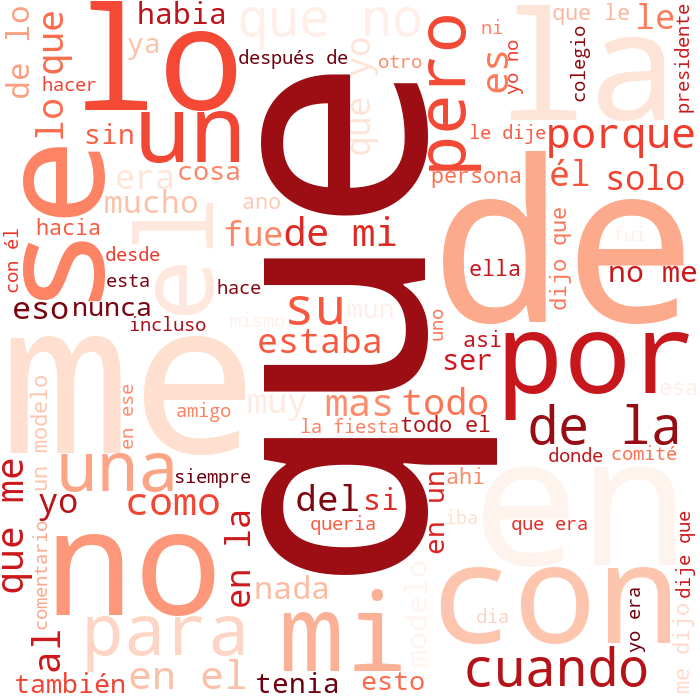

In [77]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=STOP , colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [78]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [79]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
se, por, del, mi, lo, para, yo, al, las, con, los, modelo, lo que, es, le

Topic #1:
yo, lo, era, con, mi, estaba, fiesta, le, él, se, la fiesta, por, para, pero, del

Topic #2:
mi, se, con, modelo, le, yo, de mi, del, él, por, toda, lo, fiesta, fue, para

Topic #3:
lo, con, le, pero, que me, mas, las, hombres, hacian, estaba, para, los, onu, como, saber

Topic #4:
mi, yo, lo, con, por, los, le, era, se, para, ese, las, su, como, cuando

Topic #5:
le, lo, yo, por, porque, que no, es, veces, pero, mi, los, hacia, tiempo, cuando, él


## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [80]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 16.3 s


Text(0, 0.5, 'log-likelihood')

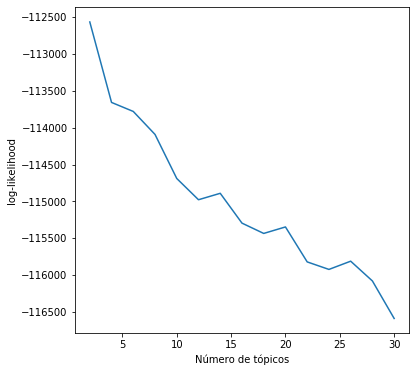

In [81]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA

In [ ]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

In [39]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook